<a href="https://colab.research.google.com/github/tuhinmallick/AI-for-Fashion/blob/main/Florence_2_Run_a_Vision_language_Model_on_Your_Computer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*More details in this article: [Florence-2: Run Multitask Vision-language Models on Your Computer](https://newsletter.kaitchup.com/p/florence-2-run-multitask-vision-language)*

This notebook shows how to run Florence-2 for various tasks: image captioning, object detection, and OCR.

It borrows code from [the official notebook released by Meta](https://huggingface.co/microsoft/Florence-2-large/blob/main/sample_inference.ipynb), which has been simplified and commented.

First, we need to install the following:

In [ ]:
!pip install einops timm flash_attn accelerate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.2/43.2 kB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 53.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 80.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 309.4/309.4 kB 43.2 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu

Then, import:

In [ ]:
from transformers import AutoProcessor, AutoModelForCausalLM
from PIL import Image, ImageDraw, ImageFont
import random
import numpy as np
colormap = ['blue','orange','green','purple','brown','pink','gray','olive','cyan','red',
            'lime','indigo','violet','aqua','magenta','coral','gold','tan','skyblue']
import requests
import copy
%matplotlib inline

To load the model, it’s not different from an LLM. In this notebook, I only experiment with Florence-2 large but if you need a smaller model you can load the base version instead. It would work the same.

We also need a processor to process the multimodal input. It combines a text processor, i.e., a tokenizer, and an image processor.

In [ ]:
model_id = 'microsoft/Florence-2-large'
model = AutoModelForCausalLM.from_pretrained(model_id, trust_remote_code=True, device_map='cuda')
print(model)
processor = AutoProcessor.from_pretrained(model_id, trust_remote_code=True)

config.json:   0%|          | 0.00/2.44k [00:00<?, ?B/s]

configuration_florence2.py:   0%|          | 0.00/15.1k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/microsoft/Florence-2-large:
- configuration_florence2.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


modeling_florence2.py:   0%|          | 0.00/127k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/microsoft/Florence-2-large:
- modeling_florence2.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


pytorch_model.bin:   0%|          | 0.00/1.54G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/51.0 [00:00<?, ?B/s]

Florence2ForConditionalGeneration(
  (vision_tower): DaViT(
    (convs): ModuleList(
      (0): ConvEmbed(
        (proj): Conv2d(3, 256, kernel_size=(7, 7), stride=(4, 4), padding=(3, 3))
        (norm): LayerNorm((256,), eps=1e-05, elementwise_affine=True)
      )
      (1): ConvEmbed(
        (proj): Conv2d(256, 512, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
        (norm): LayerNorm((256,), eps=1e-05, elementwise_affine=True)
      )
      (2): ConvEmbed(
        (proj): Conv2d(512, 1024, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
        (norm): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
      )
      (3): ConvEmbed(
        (proj): Conv2d(1024, 2048, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
        (norm): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
      )
    )
    (blocks): ModuleList(
      (0): MySequential(
        (0): MySequential(
          (spatial_block): SpatialBlock(
            (conv1): PreNorm(
              (fn): De

preprocessor_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

processing_florence2.py:   0%|          | 0.00/46.4k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/microsoft/Florence-2-large:
- processing_florence2.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


tokenizer_config.json:   0%|          | 0.00/34.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.10M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

The following method extracts the pixel values and tokenizes the prompt into token IDs. The next step is a call to "generate" which generates the model answers and location tokens depending on the task.



In [ ]:
def run_example(task_prompt, image):
    inputs = processor(text=task_prompt, images=image, return_tensors="pt")
    generated_ids = model.generate(
      input_ids=inputs["input_ids"].cuda(),
      pixel_values=inputs["pixel_values"].cuda(),
      max_new_tokens=1024,
      early_stopping=False,
      do_sample=False,
      num_beams=3,
    )
    generated_text = processor.batch_decode(generated_ids, skip_special_tokens=False)[0]
    parsed_answer = processor.post_process_generation(
        generated_text,
        task=task_prompt,
        image_size=(image.width, image.height)
    )

    return parsed_answer

For this notebook, we are going to run Florence-2 on two different images loaded with Image.open

In [ ]:
url1 = "https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/transformers/tasks/bee.JPG?download=true"
image1 = Image.open(requests.get(url1, stream=True).raw)


url2 = "https://images.unsplash.com/photo-1601751664209-be452817a8ce?q=80&w=2574&auto=format&fit=crop&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D"
image2 = Image.open(requests.get(url2, stream=True).raw)


In [ ]:
image1

In [ ]:
image2

For the tasks, we simply prompt the model with the task tag and call "run_example" to get the answer and the location tokens.

In [ ]:
task_prompt = '<CAPTION>'
run_example(task_prompt,image1)

{'<CAPTION>': '\nA pink flower with a bee on it.\n'}

In [ ]:
run_example(task_prompt,image2)

{'<CAPTION>': '\nA crowd of people walking down a busy city street at night.\n'}

In [ ]:
task_prompt = '<DETAILED_CAPTION>'
run_example(task_prompt, image1)

{'<DETAILED_CAPTION>': '\nThe image shows a bee perched on a pink cosmos flower surrounded by other pink and red flowers and green leaves in the background, which is slightly blurred.\n'}

In [ ]:
run_example(task_prompt,image2)

{'<DETAILED_CAPTION>': '\nThe image shows a bustling Times Square in New York City at night. There are many people walking around, some carrying bags, and vehicles driving on the road. The buildings in the background are illuminated with bright lights and boards with text, and a clock tower stands tall in the distance. The sky is dark, adding to the atmosphere of the bustling city.\n'}

To process the location tokens and render them on the image, the following method will be called to plot bounding boxes.

{'<OD>': {'bboxes': [[2283.552001953125, 1612.2239990234375, 2884.89599609375, 2102.97607421875], [1215.64794921875, 654.9119873046875, 3833.568115234375, 3177.7919921875], [2.5920000076293945, 889.9200439453125, 1153.4400634765625, 2351.80810546875], [2.5920000076293945, 2313.7919921875, 832.031982421875, 3450.816162109375], [4300.1279296875, 502.8480224609375, 4963.68017578125, 1646.7840576171875], [3460.320068359375, 2306.880126953125, 4476.3837890625, 2925.504150390625], [3766.176025390625, 2517.696044921875, 4351.9677734375, 3450.816162109375], [2599.776123046875, 513.2160034179688, 3403.2958984375, 1111.10400390625], [2.5920000076293945, 271.2960205078125, 520.9920043945312, 910.656005859375], [3460.320068359375, 2313.7919921875, 4009.823974609375, 2894.400146484375], [4103.13623046875, 2310.336181640625, 4481.56787109375, 2922.048095703125]], 'labels': ['bee', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower', 'flower']}}


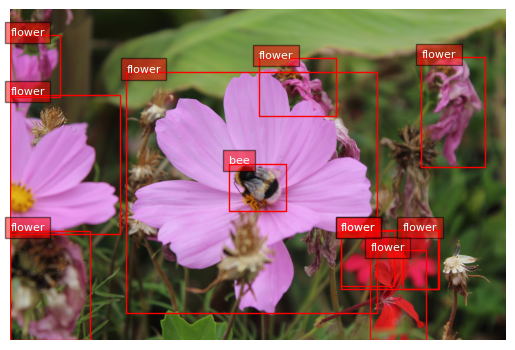

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
def plot_bbox(image, data):
   # Create a figure and axes
    fig, ax = plt.subplots()

    # Display the image
    ax.imshow(image)

    # Plot each bounding box
    for bbox, label in zip(data['bboxes'], data['labels']):
        # Unpack the bounding box coordinates
        x1, y1, x2, y2 = bbox
        # Create a Rectangle patch
        rect = patches.Rectangle((x1, y1), x2-x1, y2-y1, linewidth=1, edgecolor='r', facecolor='none')
        # Add the rectangle to the Axes
        ax.add_patch(rect)
        # Annotate the label
        plt.text(x1, y1, label, color='white', fontsize=8, bbox=dict(facecolor='red', alpha=0.5))

    # Remove the axis ticks and labels
    ax.axis('off')

    # Show the plot
    plt.show()

task_prompt = '<OD>'
results = run_example(task_prompt,image1)
print(results)
plot_bbox(image1, results['<OD>'])

{'<OD>': {'bboxes': [[1.2869999408721924, 1762.5465087890625, 343.6289978027344, 2693.047607421875], [1167.3089599609375, 1801.156494140625, 1398.968994140625, 2944.012451171875], [1.2869999408721924, 777.9915161132812, 243.2429962158203, 1801.156494140625], [238.09498596191406, 2036.677490234375, 572.7149658203125, 2723.935546875], [1947.23095703125, 2071.426513671875, 2256.11083984375, 2716.213623046875], [238.09498596191406, 1144.7864990234375, 464.6069641113281, 1978.7625732421875], [2238.093017578125, 2295.364501953125, 2500.640869140625, 2843.62646484375], [1954.952880859375, 2735.5185546875, 2315.31298828125, 2982.62255859375], [1849.4189453125, 1233.5894775390625, 1944.6568603515625, 2245.171630859375], [562.4189453125, 2218.14453125, 693.6929931640625, 2808.87744140625], [1128.698974609375, 1337.8365478515625, 1411.8389892578125, 1604.2454833984375], [1123.5509033203125, 781.8525390625, 1370.6549072265625, 944.0145263671875], [1175.031005859375, 1635.133544921875, 1370.6549072

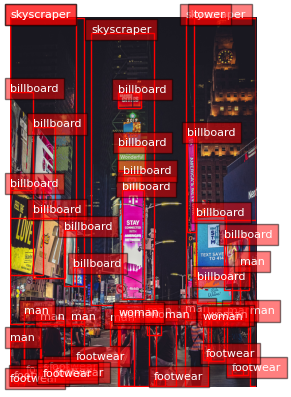

In [ ]:
results = run_example(task_prompt,image2)
print(results)
plot_bbox(image2, results['<OD>'])

{'<DENSE_REGION_CAPTION>': {'bboxes': [[1220.83203125, 654.9119873046875, 3833.568115234375, 3181.248046875], [2.5920000076293945, 893.3760375976562, 1158.6240234375, 2355.26416015625], [3180.384033203125, 2521.152099609375, 4362.3359375, 3450.816162109375], [2.5920000076293945, 2317.248046875, 842.4000244140625, 3450.816162109375], [4300.1279296875, 506.30401611328125, 4968.8642578125, 1653.696044921875], [3465.50390625, 2310.336181640625, 4486.751953125, 2928.9599609375], [3771.360107421875, 2521.152099609375, 4357.15185546875, 3450.816162109375], [2599.776123046875, 516.6719970703125, 3408.47998046875, 1118.0159912109375], [2.5920000076293945, 278.2080078125, 526.176025390625, 972.864013671875], [3465.50390625, 2317.248046875, 4015.008056640625, 2897.85595703125], [2288.736083984375, 1615.6800537109375, 2884.89599609375, 2102.97607421875], [4108.31982421875, 2313.7919921875, 4486.751953125, 2925.504150390625]], 'labels': ['A bumblebee on a pink flower with a yellow center.', 'A clos

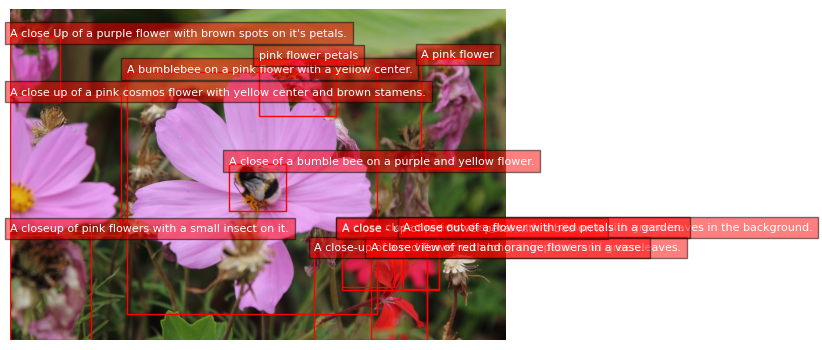

In [ ]:
task_prompt = '<DENSE_REGION_CAPTION>'
results = run_example(task_prompt,image1)
print(results)
plot_bbox(image1, results['<DENSE_REGION_CAPTION>'])

{'<DENSE_REGION_CAPTION>': {'bboxes': [[1.2869999408721924, 1.9305000305175781, 765.7649536132812, 3206.560546875], [842.9849853515625, 160.23150634765625, 1501.928955078125, 3001.927490234375], [1913.7689208984375, 1.9305000305175781, 2570.138916015625, 2113.8974609375], [1.2869999408721924, 3083.008544921875, 2570.138916015625, 3855.20849609375], [1.2869999408721924, 3086.86962890625, 1805.660888671875, 3855.20849609375], [1453.02294921875, 3129.340576171875, 1738.7369384765625, 3855.20849609375], [1169.8829345703125, 1801.156494140625, 1398.968994140625, 2944.012451171875], [1226.510986328125, 3137.0625, 1522.5208740234375, 3855.20849609375], [1947.23095703125, 2071.426513671875, 2258.684814453125, 2716.213623046875], [1828.826904296875, 3071.425537109375, 2065.635009765625, 3855.20849609375], [320.4629821777344, 3156.367431640625, 559.844970703125, 3785.71044921875], [2266.406982421875, 3094.591552734375, 2482.622802734375, 3735.517578125], [1126.125, 3113.896484375, 1298.582885742

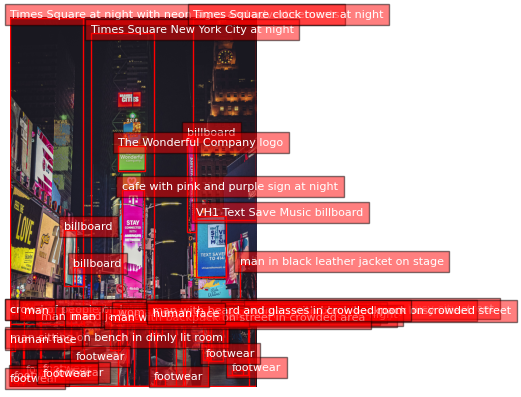

In [ ]:
results = run_example(task_prompt,image2)
print(results)
plot_bbox(image2, results['<DENSE_REGION_CAPTION>'])

{'<REGION_PROPOSAL>': {'bboxes': [[2.5920000076293945, 1.7280000448226929, 5020.7041015625, 3450.816162109375], [1215.64794921875, 654.9119873046875, 3838.751953125, 3181.248046875], [2.5920000076293945, 1.7280000448226929, 1158.6240234375, 3450.816162109375], [2.5920000076293945, 1.7280000448226929, 1153.4400634765625, 2355.26416015625], [2.5920000076293945, 893.3760375976562, 1153.4400634765625, 2355.26416015625], [2589.407958984375, 516.6719970703125, 3683.23193359375, 1591.488037109375], [2.5920000076293945, 2317.248046875, 837.2160034179688, 3450.816162109375], [2.5920000076293945, 271.2960205078125, 821.6640014648438, 1425.60009765625], [2.5920000076293945, 1.7280000448226929, 676.5120239257812, 1114.56005859375], [4294.94384765625, 506.30401611328125, 4963.68017578125, 1653.696044921875], [3460.320068359375, 2310.336181640625, 4476.3837890625, 2932.416015625], [3766.176025390625, 2521.152099609375, 4351.9677734375, 3450.816162109375], [2594.592041015625, 516.6719970703125, 3403.

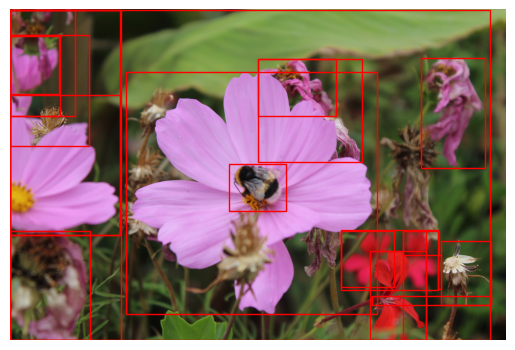

In [ ]:
task_prompt = '<REGION_PROPOSAL>'
results = run_example(task_prompt,image1)
print(results)
plot_bbox(image1, results['<REGION_PROPOSAL>'])

{'<REGION_PROPOSAL>': {'bboxes': [[1.2869999408721924, 1.9305000305175781, 2570.138916015625, 3241.3095703125], [1.2869999408721924, 1.9305000305175781, 765.7649536132812, 3206.560546875], [1.2869999408721924, 3063.70361328125, 2570.138916015625, 3855.20849609375], [1828.826904296875, 1.9305000305175781, 2570.138916015625, 3156.367431640625], [1.2869999408721924, 1.9305000305175781, 693.6929931640625, 2206.5615234375], [1.2869999408721924, 3075.28662109375, 2570.138916015625, 3855.20849609375], [858.428955078125, 160.23150634765625, 1499.35498046875, 2994.20556640625], [1.2869999408721924, 1.9305000305175781, 688.5449829101562, 2052.12158203125], [1.2869999408721924, 3079.1474609375, 1839.1229248046875, 3855.20849609375], [1921.490966796875, 1.9305000305175781, 2570.138916015625, 2113.8974609375], [1.2869999408721924, 3079.1474609375, 2570.138916015625, 3600.382568359375], [1.2869999408721924, 3079.1474609375, 1833.9749755859375, 3855.20849609375], [1.2869999408721924, 1.93050003051757

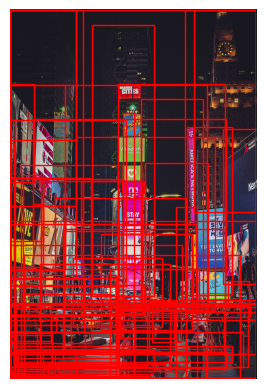

In [ ]:
results = run_example(task_prompt,image2)
print(results)
plot_bbox(image2, results['<REGION_PROPOSAL>'])

#OCR

This function processes Florence-2's output to get the location tokens, used them to draw bounding boxes, and then writes the label corresponding to the bounding boxes, i.e., the text recognized through OCR.

For the first image, there is no text. Florence-2 simply returns a "-".

In [ ]:
def draw_ocr_bboxes(image, prediction):
    scale = 1
    draw = ImageDraw.Draw(image)
    bboxes, labels = prediction['quad_boxes'], prediction['labels']
    for box, label in zip(bboxes, labels):
        color = random.choice(colormap)
        new_box = (np.array(box) * scale).tolist()
        draw.polygon(new_box, width=3, outline=color)
        draw.text((new_box[0]+8, new_box[1]+2),
                    "{}".format(label),
                    align="right",

                    fill=color)
    display(image)
task_prompt = '<OCR>'
run_example(task_prompt,image1)

{'<OCR>': '\n-\n'}

In [ ]:
run_example(task_prompt,image2)

{'<OCR>': "\nBRANDEECITES2019CALLSTHEAMERICA'S NEW YORKtheWonderfulMARRIOTTcompany.MARRIOTMARQUISFEEL THENextLOVELOVESTAYCONNECTEDWITHWITHMUSICMUSICTEXT SAVETO 414.vhvashavethemusic.comvhavishavethemusic.com-MoblleRideWave!WE FRIENDS\n"}

In [ ]:
task_prompt = '<OCR_WITH_REGION>'
results = run_example(task_prompt,image2)
print(results)
output_image2 = copy.deepcopy(image2)
draw_ocr_bboxes(output_image2, results['<OCR_WITH_REGION>'])